## Análise Exploratória de Dados com Visualização

### Importando os módulos para Análise de Dados

In [2]:
# Importando as bibliotecas pertinentes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline      
import seaborn as sns   # Biblioteca para otimizar os graficos
sns.set()               # Configuração padrão do seaborn

In [6]:
# Carregando os datasets de treino e teste (baixados do Kaggle)(obtem 2 DataFames)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
# Para visualizar somente as primeiras linhas
train.head(10)

# A coluna target = Survived
# 0 = false = morreu
# 1 = true = sobreviveu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Abaixo, está uma breve informação sobre cada coluna do conjunto de dados:
1. **PassengerId:** Número que identifica o passageiro.
2. **Survived:** Mostra se o passageiro sobreviveu ou não. 1 significa que sobreviveu e 0 significa não sobreviveu.
3. **Pclass:** Classe do bilhete. 1 significa bilhete da primeira classe. 2 significa bilhete da segunda classe. 3 significa bilhete da terceira classe.
4. **Name:** Nome do passageiro. Nome também contém título. "Sr." para o homem. "Senhora" para mulher. "Senhorita" para menina. "Mestre" para menino.
5. **Sex:** sexo do passageiro: masculino ou feminino.
6. **Age:** Idade do passageiro. Os valores "NaN" nesta coluna indicam que a idade desse passageiro não foi registrada.
7. **SibSp:** Quantidade de cônjuges e irmãos no navio.
8. **Parch:** Quantidade de pais e filhos no navio.
9. **Ticket:** Número do ticket.
10. **Fare:** Valor pago pela viagem.
11. **Cabin:** Número da cabine do passageiro. Os valores "NaN" nesta coluna indicam que o número da cabine não foi registrado.
12. **Embarked:** Porto onde o passageiro embarcou.

In [14]:
# Anlisando linhas x colunas
train.shape

(891, 12)

In [13]:
# Exibindo dados estatisticos
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Mais exibições detalhadas ( com o tipo de dado)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
# Usando o metodo isnull() para verificar os dados nulos
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Preenchendo a coluna "Age" com a media atraves do método fillna()
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Como a biblioteca pandas só aceita números para analise, modifica-se
# as variaveis pertinentes com numeros, para melhor análise.
train['Sex'] = train['Sex'].replace(['male','female'],['0','1'])

In [22]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
# Excluindo as colunas que não são pertinentes para a analise final
train.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [25]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Iniciando o mesmo procedimento no test.csv

In [26]:
# Calculando os nulos na base "Test.csv"
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
# Substituindo os valores nulos da coluna "Age" com a media
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [29]:
# Substituindo os valores nulos da coluna "Fare" com a media
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [30]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
# Como a biblioteca pandas só aceita números para analise, modifica-se
# as variaveis pertinentes com numeros, para melhor análise.
test['Sex'] = test['Sex'].replace(['male','female'],['0','1'])

In [33]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [36]:
# Exibindo as colunas para analise do tratamento
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [35]:
# Excluindo as colunas que não são pertinentes para a analise final
test.drop(['Name','Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [37]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [38]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [39]:
# Usando o metodo groupby() para agrupar os dados -> e exibindo os sobreviventes com o metodo value_counts()
# Usando como base a coluna "Pclass"
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [40]:
# Usando o metodo groupby() para agrupar os dados -> e exibindo os sobreviventes com o metodo value_counts()
# Usando como base a coluna "Sex"
train.groupby('Sex').Survived.value_counts()

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: Survived, dtype: int64

## Visualizando os dados

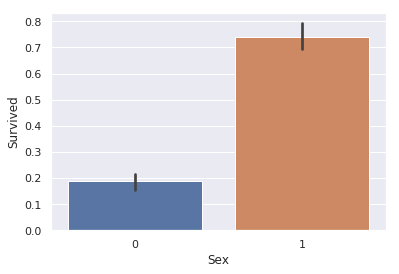

In [41]:
# Plotando um grafico com a bilbioteca seaborn para otimizar o matplotlib em %
sns.barplot(x='Sex', y='Survived', data=train)

/home/ocean/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ocean/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


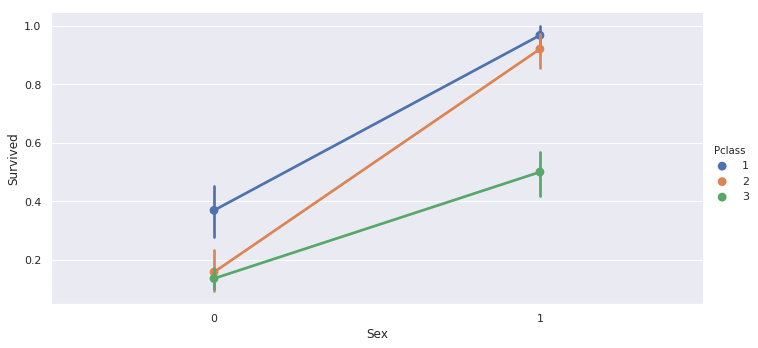

In [42]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=5, aspect=2, data=train)

## Treinando um classificador

In [43]:
treino = train.drop('Survived', axis=1)  ### armazena os dados do passageiro sem o atributo 'Survived'
labels_treino = train['Survived']        ### armazena o que nós queremos prever, que é a a coluna Survived, 
                                         ### informando se o tripulante sobreviveu (1) ou não (0).

teste = test.drop("PassengerId", axis=1)    ### 

In [45]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [48]:
clf = LogisticRegression()       # Inicializa o classificador
clf.fit(treino, labels_treino)   # Treina o classificador
predicao_lg = clf.predict(teste) # Faz a previsão
acuracia_lg = round( clf.score(treino, labels_treino) * 100, 2)  # Escore da acurácia obtida pelo classificador em percentual
print(predicao_lg)    # Mostra as predições realizadas no arquivo de teste
print (str(acuracia_lg) + ' %')

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
80.02 %


/home/ocean/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(treino, labels_treino)
predicao_rf = clf.predict(teste)
acuracia_rf = round(clf.score(treino, labels_treino) * 100, 2)
print(predicao_rf)
print (acuracia_rf)

[0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]
98.2


In [50]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.50000,0,0,7.8292
1,893,3,1,47.00000,1,0,7.0000
2,894,2,0,62.00000,0,0,9.6875
3,895,3,0,27.00000,0,0,8.6625
4,896,3,1,22.00000,1,1,12.2875
5,897,3,0,14.00000,0,0,9.2250
6,898,3,1,30.00000,0,0,7.6292
7,899,2,0,26.00000,1,1,29.0000
8,900,3,1,18.00000,0,0,7.2292
9,901,3,0,21.00000,2,0,24.1500
